#Librerias

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# Funciones

In [23]:
def create_dataset(dataset, look_back=1):
 dataX, dataY = [], []
 for i in range(len(dataset)-look_back-1):
  a = dataset[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(dataset[i + look_back, 0])
 return np.array(dataX), np.array(dataY)

In [94]:
def create_dataset2(series, look_back):
    X, y = [], []
    for i in range(len(series) - look_back):
        X.append(series[i:i + look_back])
        y.append(series[i + look_back])
    return np.array(X), np.array(y)

#Dataset

El dataset esta limpio ya viene preprocesado <br>
El objetivo es predecir el número de pasajeros de aerolíneas internacionales.

Se trata de un problema en el que, dado un año y un mes, la tarea consiste en predecir el número de pasajeros de líneas aéreas internacionales en unidades de 1.000. Los datos abarcan desde enero de 1949 hasta diciembre de 1960, o 12 años, con 144 observaciones.

In [7]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Talento_tech/airline-passengers.csv")
df.head(10)

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [8]:
#No hay valores nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


#Grafica de los datos

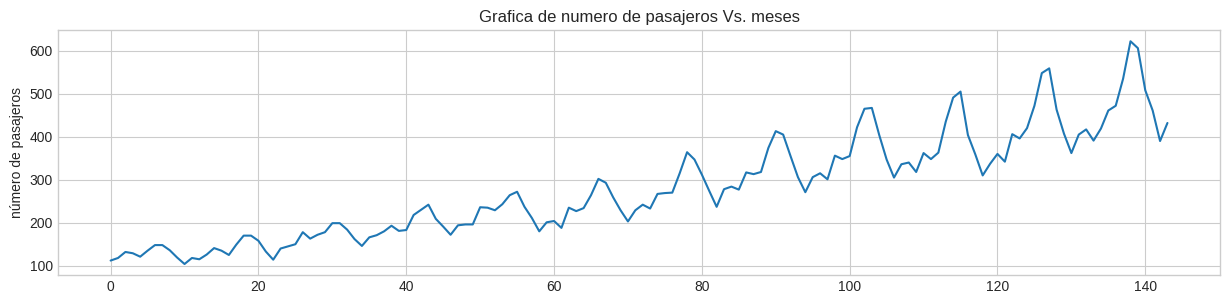

In [13]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(df['Passengers'])
plt.ylabel('número de pasajeros')
plt.title('Grafica de numero de pasajeros Vs. meses')
plt.show()

#Series temporales Univariadas

##LSTM

In [79]:
tf.random.set_seed(6)  #en TensorFlow establece una "semilla" para los generadores de números aleatorios

#Cargar el dataset
pasajeros = df['Passengers'].values   # obtengo un array
pasajeros = pasajeros.astype('float32')

#Normlizar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
pasajeros = pasajeros.reshape(-1, 1)
pasajeros = scaler.fit_transform(pasajeros)

#Dividir los datos para entrenar y testear
train_ = int(len(pasajeros) * 0.70)  # 70% para entrenar, 30% para testear
test_size = len(pasajeros) - train_
train, test = pasajeros[0:train_,:], pasajeros[train_:len(pasajeros),:]

print(len(train), len(test))


#Organizar los datos para pasarlos a la red
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

#Creo el modelo con la LSTM
model = Sequential()
model.add(LSTM(5, input_shape=(1, look_back))) #Añado 5 capas
model.add(Dense(10)) #Neuronas
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2)

#El valor de la función de perdida es bajo, entonces es bien

100 44
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 - 2s - 23ms/step - loss: 0.0185
Epoch 2/50
98/98 - 0s - 2ms/step - loss: 0.0130
Epoch 3/50
98/98 - 0s - 2ms/step - loss: 0.0104
Epoch 4/50
98/98 - 0s - 2ms/step - loss: 0.0077
Epoch 5/50
98/98 - 0s - 2ms/step - loss: 0.0053
Epoch 6/50
98/98 - 0s - 3ms/step - loss: 0.0036
Epoch 7/50
98/98 - 0s - 2ms/step - loss: 0.0028
Epoch 8/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 9/50
98/98 - 0s - 3ms/step - loss: 0.0024
Epoch 10/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 11/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 12/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 13/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 14/50
98/98 - 0s - 2ms/step - loss: 0.0025
Epoch 15/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 16/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 17/50
98/98 - 0s - 2ms/step - loss: 0.0025
Epoch 18/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 19/50
98/98 - 0s - 3ms/step - loss: 0.0025
Epoch 20/50
98/98 - 0s - 2ms/step - loss: 0.0025
Epoch 21/50
98/98 - 0s - 3ms/step - los

In [102]:
#Hago las predicciones
testPredict = model.predict(testX)
# invert predictions
testPredict = scaler.inverse_transform(testPredict)
testY_ = scaler.inverse_transform([testY])


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [147]:
# calculo las metricas para ver el rendimiento del algoritmo
testScore = np.sqrt(mean_squared_error(testY_[0][:len(testY_[0])-1], testPredict[:,0][1:]))
print('Test Score: %.2f RMSE' % (testScore))
testMAE = mean_absolute_error(testY_[0][:len(testY_[0])-1], testPredict[:,0][1:])
print('Test MAE: %.2f' % testMAE)
testR2 = r2_score(testY_[0][:len(testY_[0])-1], testPredict[:,0][1:])
print('Test R^2 Score: %.2f' % testR2)
corr_coeff, p_value = pearsonr(testY_[0][:len(testY_[0])-1], testPredict[:,0][1:])
print('Pearson Correlation Coefficient: %.2f' % corr_coeff)

Test Score: 2.69 RMSE
Test MAE: 2.19
Test R^2 Score: 1.00
Pearson Correlation Coefficient: 1.00


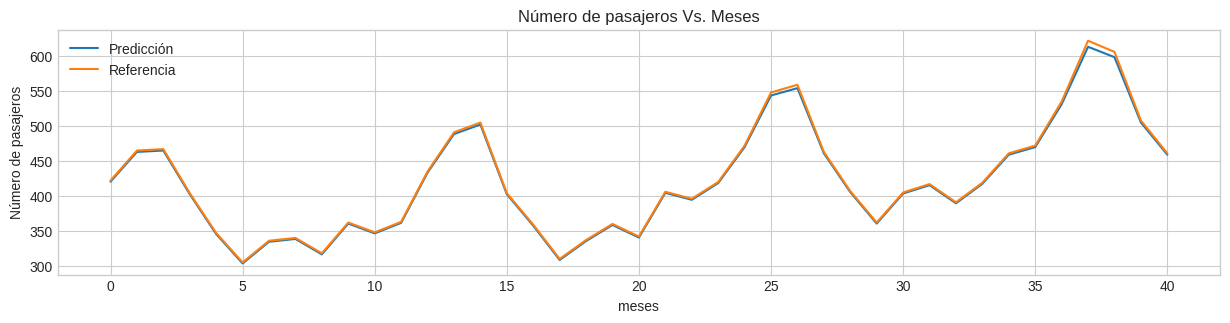

In [141]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(testPredict.transpose()[0][1:],label='Predicción')
plt.subplot(211)
plt.plot(testY_[0][:len(testY_[0])-1],label='Referencia')
plt.legend()
plt.xlabel('meses')
plt.ylabel('Número de pasajeros')
plt.title('Predicción para LSTM')
plt.show()

## Regresión lineal

In [150]:
#Cargar los datos
pasajeros = df['Passengers'].values   # obtengo un array
pasajeros = pasajeros.astype('float32')


#Dividir los datos para entrenar y testear

train_ = int(len(pasajeros) * 0.70)  # 70% para entrenar, 30% para testear
test_size = len(pasajeros) - train_
train=pasajeros[0:train_]
test = pasajeros[train_:len(pasajeros)]

look_back = 1  # Puedes ajustar esto según tus necesidades
trainX, trainY = create_dataset2(train, look_back)
testX, testY_ = create_dataset2(test, look_back)
#trainX = trainX.reshape(-1)
#testX = testX.reshape(-1)

# Crear y ajustar el modelo
model = LinearRegression()
model.fit(trainX, trainY)

# Realizar predicciones
predictions = model.predict(testX)

In [151]:
# calculo las metricas para ver el rendimiento del algoritmo
testScore = np.sqrt(mean_squared_error(testY_[:len(testY_)-1], predictions[1:]))
print('Test Score: %.2f RMSE' % (testScore))
testMAE = mean_absolute_error(testY_[:len(testY_)-1], predictions[1:])
print('Test MAE: %.2f' % testMAE)
testR2 = r2_score(testY_[:len(testY_)-1], predictions[1:])
print('Test R^2 Score: %.2f' % testR2)
corr_coeff, p_value = pearsonr(testY_[:len(testY_)-1], predictions[1:])
print('Pearson Correlation Coefficient: %.2f' % corr_coeff)

Test Score: 7.99 RMSE
Test MAE: 7.13
Test R^2 Score: 0.99
Pearson Correlation Coefficient: 1.00


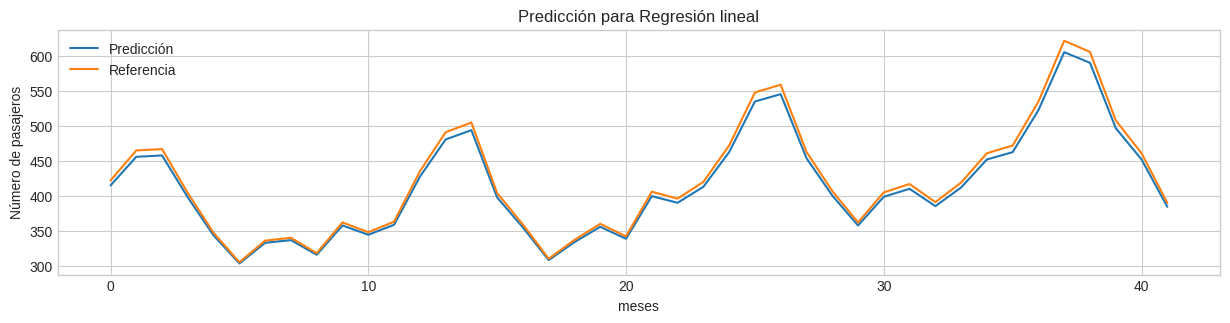

In [152]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(predictions[1:],label='Predicción')
plt.subplot(211)
plt.plot(testY_[:len(testY_)-1],label='Referencia')
plt.legend()
plt.xlabel('Meses')
plt.ylabel('Número de pasajeros')
plt.title('Predicción para Regresión lineal')
plt.show()

## Regresión de Support Vector (SVR)

In [165]:
#Cargar los datos
pasajeros = df['Passengers'].values   # obtengo un array
pasajeros = pasajeros.astype('float32')


#Dividir los datos para entrenar y testear

train_ = int(len(pasajeros) * 0.70)  # 70% para entrenar, 30% para testear
test_size = len(pasajeros) - train_
train=pasajeros[0:train_]
test = pasajeros[train_:len(pasajeros)]

look_back = 1  # Puedes ajustar esto según tus necesidades
trainX, trainY = create_dataset2(train, look_back)
testX, testY_ = create_dataset2(test, look_back)
#trainX = trainX.reshape(-1)
#testX = testX.reshape(-1)

# Crear y ajustar el modelo
model = SVR(kernel='linear', C=100, epsilon=0.1)
model.fit(trainX, trainY)

# Realizar predicciones
predictions = model.predict(testX)

In [166]:
# calculo las metricas para ver el rendimiento del algoritmo
testScore = np.sqrt(mean_squared_error(testY_[:len(testY_)-1], predictions[1:]))
print('Test Score: %.2f RMSE' % (testScore))
testMAE = mean_absolute_error(testY_[:len(testY_)-1], predictions[1:])
print('Test MAE: %.2f' % testMAE)
testR2 = r2_score(testY_[:len(testY_)-1], predictions[1:])
print('Test R^2 Score: %.2f' % testR2)
corr_coeff, p_value = pearsonr(testY_[:len(testY_)-1], predictions[1:])
print('Pearson Correlation Coefficient: %.2f' % corr_coeff)

Test Score: 12.80 RMSE
Test MAE: 11.88
Test R^2 Score: 0.97
Pearson Correlation Coefficient: 1.00


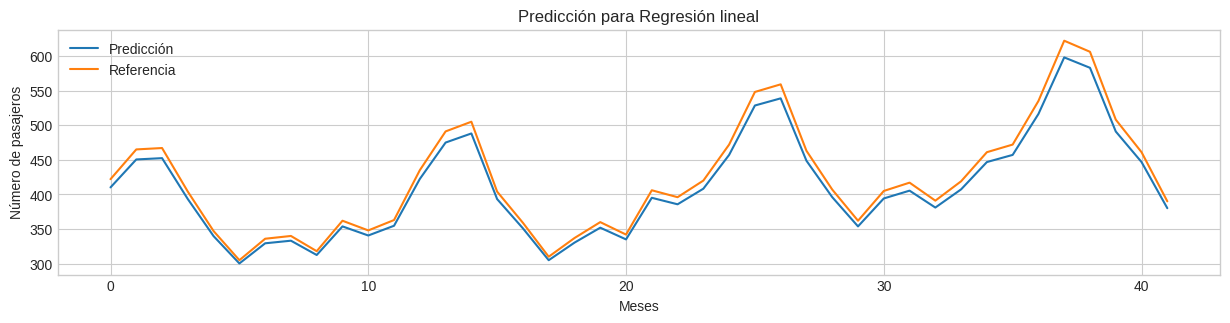

In [167]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(predictions[1:],label='Predicción')
plt.subplot(211)
plt.plot(testY_[:len(testY_)-1],label='Referencia')
plt.legend()
plt.xlabel('Meses')
plt.ylabel('Número de pasajeros')
plt.title('Predicción para Regresión lineal')
plt.show()

## Regresión de Árboles de Decisión

In [173]:
#Cargar los datos
pasajeros = df['Passengers'].values   # obtengo un array
pasajeros = pasajeros.astype('float32')


#Dividir los datos para entrenar y testear

train_ = int(len(pasajeros) * 0.70)  # 70% para entrenar, 30% para testear
test_size = len(pasajeros) - train_
train=pasajeros[0:train_]
test = pasajeros[train_:len(pasajeros)]

look_back = 1  # Puedes ajustar esto según tus necesidades
trainX, trainY = create_dataset2(train, look_back)
testX, testY_ = create_dataset2(test, look_back)
#trainX = trainX.reshape(-1)
#testX = testX.reshape(-1)

# Crear y ajustar el modelo
model = DecisionTreeRegressor(criterion='absolute_error')
model.fit(trainX, trainY)

# Realizar predicciones
predictions = model.predict(testX)

In [174]:
# calculo las metricas para ver el rendimiento del algoritmo
testScore = np.sqrt(mean_squared_error(testY_[:len(testY_)-1], predictions[1:]))
print('Test Score: %.2f RMSE' % (testScore))
testMAE = mean_absolute_error(testY_[:len(testY_)-1], predictions[1:])
print('Test MAE: %.2f' % testMAE)
testR2 = r2_score(testY_[:len(testY_)-1], predictions[1:])
print('Test R^2 Score: %.2f' % testR2)
corr_coeff, p_value = pearsonr(testY_[:len(testY_)-1], predictions[1:])
print('Pearson Correlation Coefficient: %.2f' % corr_coeff)

Test Score: 74.34 RMSE
Test MAE: 56.24
Test R^2 Score: 0.08
Pearson Correlation Coefficient: 0.81


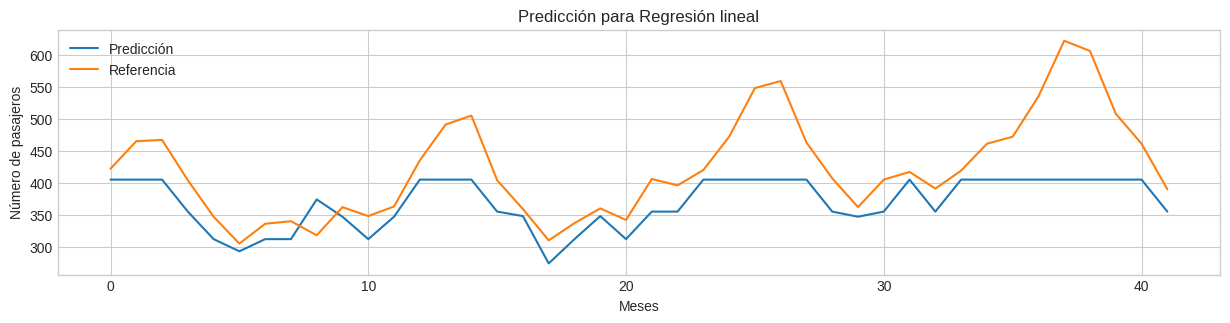

In [175]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(predictions[1:],label='Predicción')
plt.subplot(211)
plt.plot(testY_[:len(testY_)-1],label='Referencia')
plt.legend()
plt.xlabel('Meses')
plt.ylabel('Número de pasajeros')
plt.title('Predicción para Regresión lineal')
plt.show()

## ExtraTreesRegressor

In [179]:
#Cargar los datos
pasajeros = df['Passengers'].values   # obtengo un array
pasajeros = pasajeros.astype('float32')


#Dividir los datos para entrenar y testear

train_ = int(len(pasajeros) * 0.70)  # 70% para entrenar, 30% para testear
test_size = len(pasajeros) - train_
train=pasajeros[0:train_]
test = pasajeros[train_:len(pasajeros)]

look_back = 1  # Puedes ajustar esto según tus necesidades
trainX, trainY = create_dataset2(train, look_back)
testX, testY_ = create_dataset2(test, look_back)
#trainX = trainX.reshape(-1)
#testX = testX.reshape(-1)

# Crear y ajustar el modelo
model = ExtraTreesRegressor(n_estimators=100, random_state=0)
model.fit(trainX, trainY)

# Realizar predicciones
predictions = model.predict(testX)

In [180]:
# calculo las metricas para ver el rendimiento del algoritmo
testScore = np.sqrt(mean_squared_error(testY_[:len(testY_)-1], predictions[1:]))
print('Test Score: %.2f RMSE' % (testScore))
testMAE = mean_absolute_error(testY_[:len(testY_)-1], predictions[1:])
print('Test MAE: %.2f' % testMAE)
testR2 = r2_score(testY_[:len(testY_)-1], predictions[1:])
print('Test R^2 Score: %.2f' % testR2)
corr_coeff, p_value = pearsonr(testY_[:len(testY_)-1], predictions[1:])
print('Pearson Correlation Coefficient: %.2f' % corr_coeff)

Test Score: 73.06 RMSE
Test MAE: 52.38
Test R^2 Score: 0.11
Pearson Correlation Coefficient: 0.79


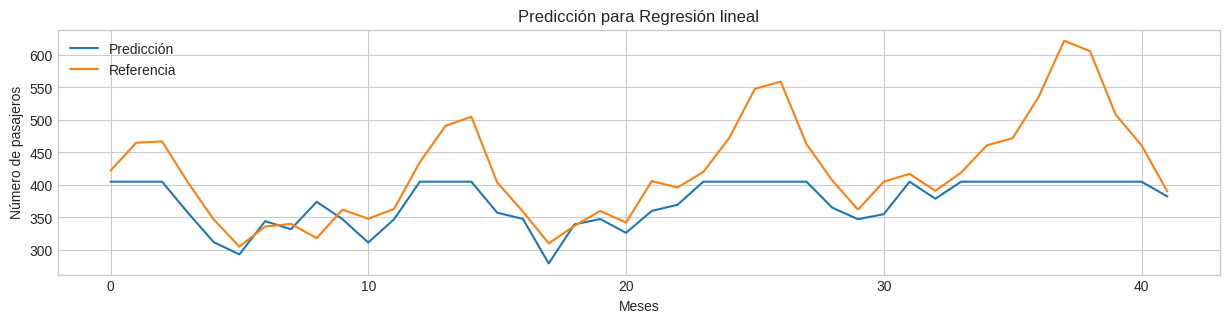

In [181]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(predictions[1:],label='Predicción')
plt.subplot(211)
plt.plot(testY_[:len(testY_)-1],label='Referencia')
plt.legend()
plt.xlabel('Meses')
plt.ylabel('Número de pasajeros')
plt.title('Predicción para Regresión lineal')
plt.show()

## Regresión de Random Forest

In [198]:
#Cargar los datos
pasajeros = df['Passengers'].values   # obtengo un array
pasajeros = pasajeros.astype('float32')


#Dividir los datos para entrenar y testear

train_ = int(len(pasajeros) * 0.70)  # 70% para entrenar, 30% para testear
test_size = len(pasajeros) - train_
train=pasajeros[0:train_]
test = pasajeros[train_:len(pasajeros)]

look_back = 1  # Puedes ajustar esto según tus necesidades
trainX, trainY = create_dataset2(train, look_back)
testX, testY_ = create_dataset2(test, look_back)
#trainX = trainX.reshape(-1)
#testX = testX.reshape(-1)

# Crear y ajustar el modelo
model =  XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)
model.fit(trainX, trainY)

# Realizar predicciones
predictions = model.predict(testX)

In [199]:
# calculo las metricas para ver el rendimiento del algoritmo
testScore = np.sqrt(mean_squared_error(testY_[:len(testY_)-1], predictions[1:]))
print('Test Score: %.2f RMSE' % (testScore))
testMAE = mean_absolute_error(testY_[:len(testY_)-1], predictions[1:])
print('Test MAE: %.2f' % testMAE)
testR2 = r2_score(testY_[:len(testY_)-1], predictions[1:])
print('Test R^2 Score: %.2f' % testR2)
corr_coeff, p_value = pearsonr(testY_[:len(testY_)-1], predictions[1:])
print('Pearson Correlation Coefficient: %.2f' % corr_coeff)

Test Score: 78.02 RMSE
Test MAE: 53.14
Test R^2 Score: -0.01
Pearson Correlation Coefficient: 0.79


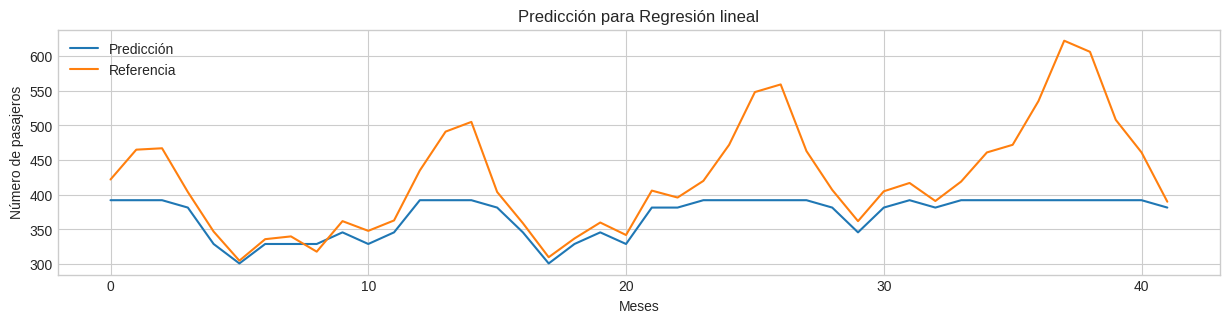

In [200]:
plt.figure(figsize=(15, 7))
plt.subplot(211)
plt.plot(predictions[1:],label='Predicción')
plt.subplot(211)
plt.plot(testY_[:len(testY_)-1],label='Referencia')
plt.legend()
plt.xlabel('Meses')
plt.ylabel('Número de pasajeros')
plt.title('Predicción para Regresión lineal')
plt.show()

## Conclusion

Los mejores resultados son con la Red neuronal LSTM